In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("final_dataset.csv")
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [3]:
df.shape

(1461, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [5]:
df.isnull().sum()

Date              0
Month             0
Year              0
Holidays_Count    0
Days              0
PM2.5             0
PM10              0
NO2               0
SO2               0
CO                0
Ozone             0
AQI               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


In [8]:
df.columns

Index(['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI'],
      dtype='object')

In [9]:
columns=['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']

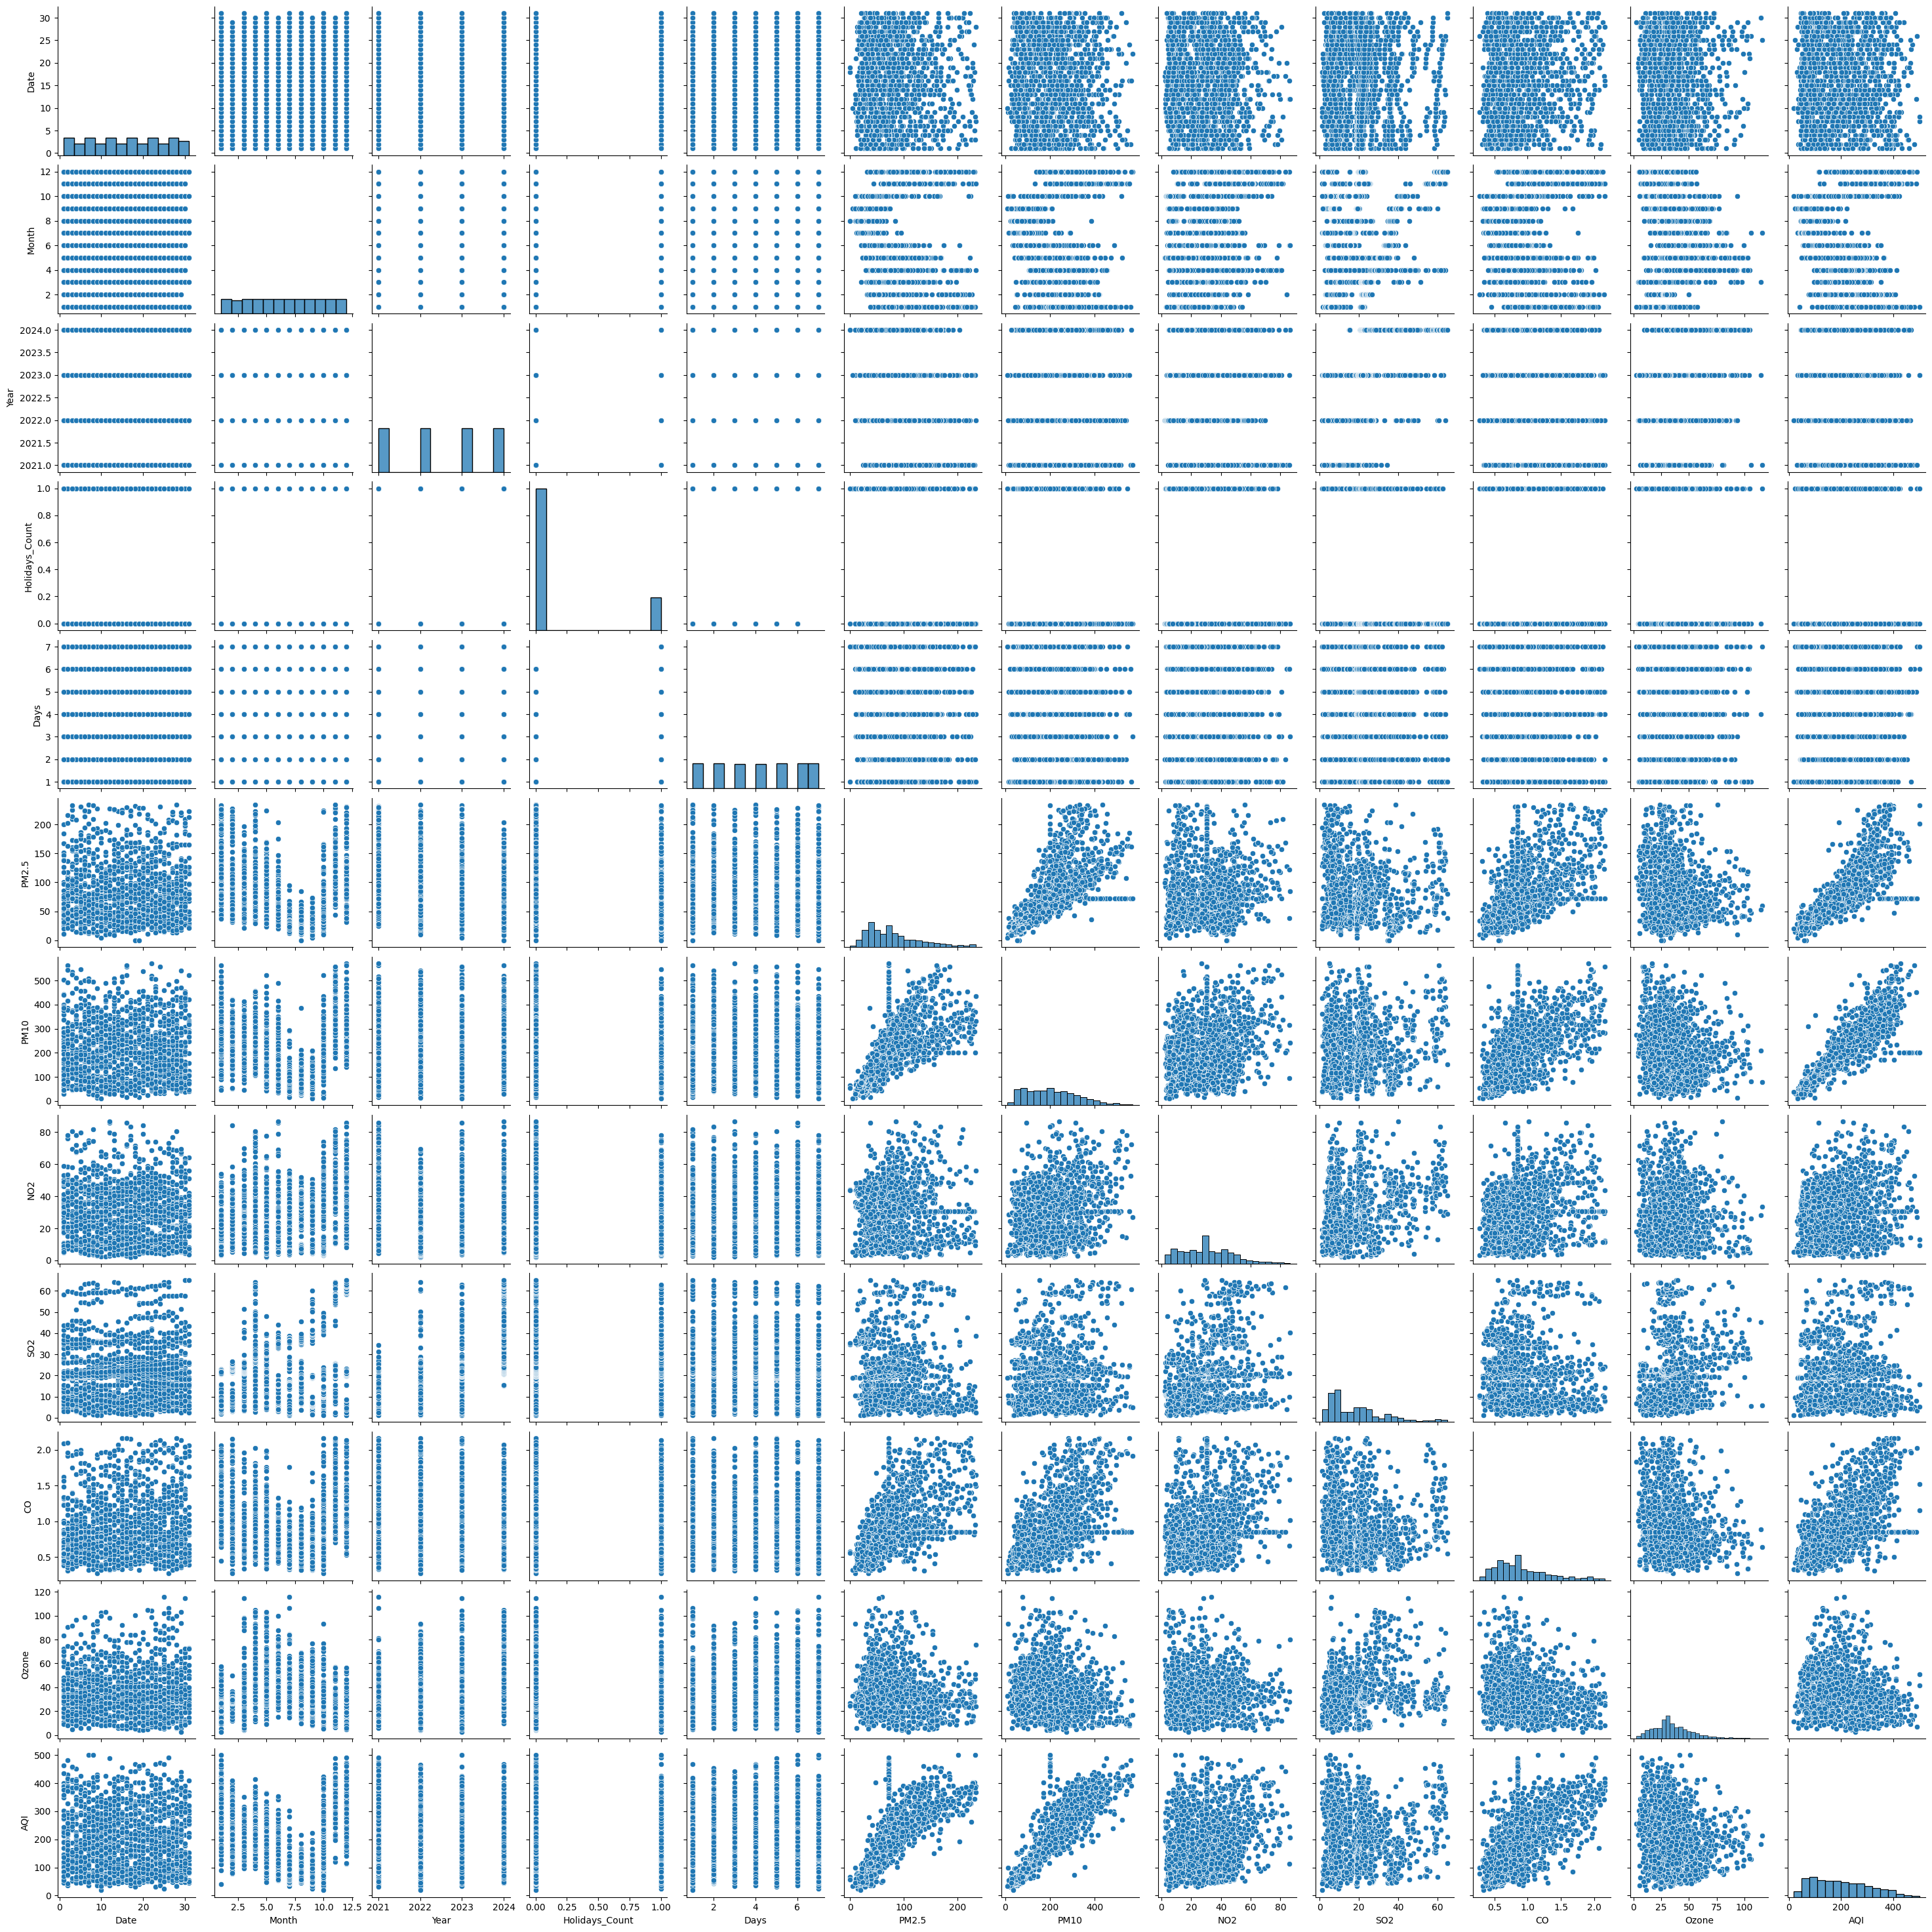

In [21]:
sns.pairplot(data=df)
plt.show()

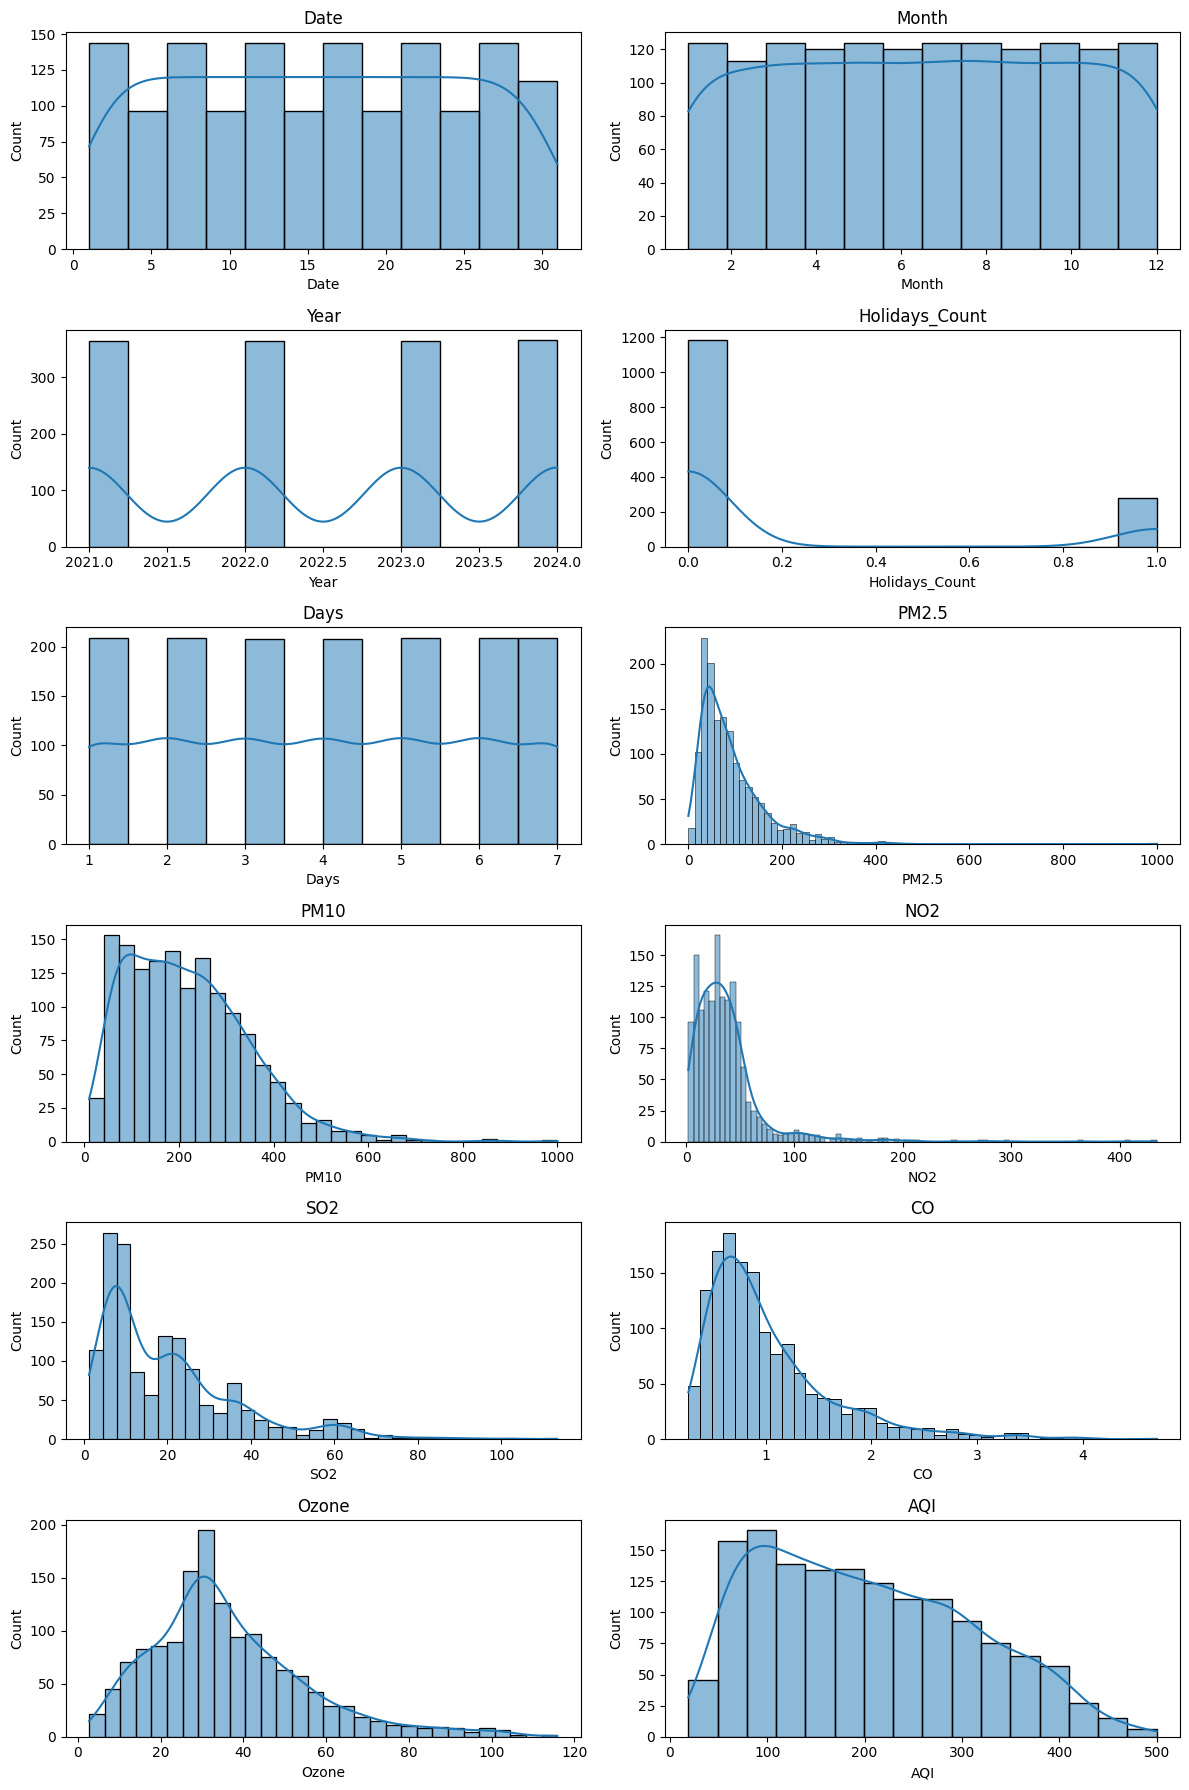

In [11]:

plt.figure(figsize=(12, 18))
k = 1
for i in columns: 
    plt.subplot(6, 2, k)
    sns.histplot(x=i, kde=True, data=df)
    plt.title(i)
    k += 1

plt.tight_layout()
plt.show()


In [12]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = df['PM2.5'].quantile(0.25)
q3 = df['PM2.5'].quantile(0.75)

# Interquartile Range (IQR)
iqr = q3 - q1

# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
median_value = df['PM2.5'].median()

# Step 3: Replace outliers with median using loc
df.loc[(df['PM2.5'] < lower_bound) | (df['PM2.5'] > upper_bound), 'PM2.5'] = median_value

In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = df['PM10'].quantile(0.25)
q3 = df['PM10'].quantile(0.75)

# Interquartile Range (IQR)
iqr = q3 - q1

# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
median_value = df['PM10'].median()

# Step 3: Replace outliers with median using loc
df.loc[(df['PM10'] < lower_bound) | (df['PM10'] > upper_bound), 'PM10'] = median_value

In [14]:
q1 = df['NO2'].quantile(0.25)
q3 = df['NO2'].quantile(0.75)

# Interquartile Range (IQR)
iqr = q3 - q1

# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
median_value = df['NO2'].median()

# Step 3: Replace outliers with median using loc
df.loc[(df['NO2'] < lower_bound) | (df['NO2'] > upper_bound), 'NO2'] = median_value

In [15]:
q1 = df['CO'].quantile(0.25)
q3 = df['CO'].quantile(0.75)

# Interquartile Range (IQR)
iqr = q3 - q1

# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
median_value = df['CO'].median()

# Step 3: Replace outliers with median using loc
df.loc[(df['CO'] < lower_bound) | (df['CO'] > upper_bound), 'CO'] = median_value

In [16]:
q3 = df['SO2'].quantile(0.75)

# Interquartile Range (IQR)
iqr = q3 - q1

# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
median_value = df['SO2'].median()

# Step 3: Replace outliers with median using loc
df.loc[(df['SO2'] < lower_bound) | (df['SO2'] > upper_bound), 'SO2'] = median_value

In [17]:
df.columns

Index(['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI'],
      dtype='object')

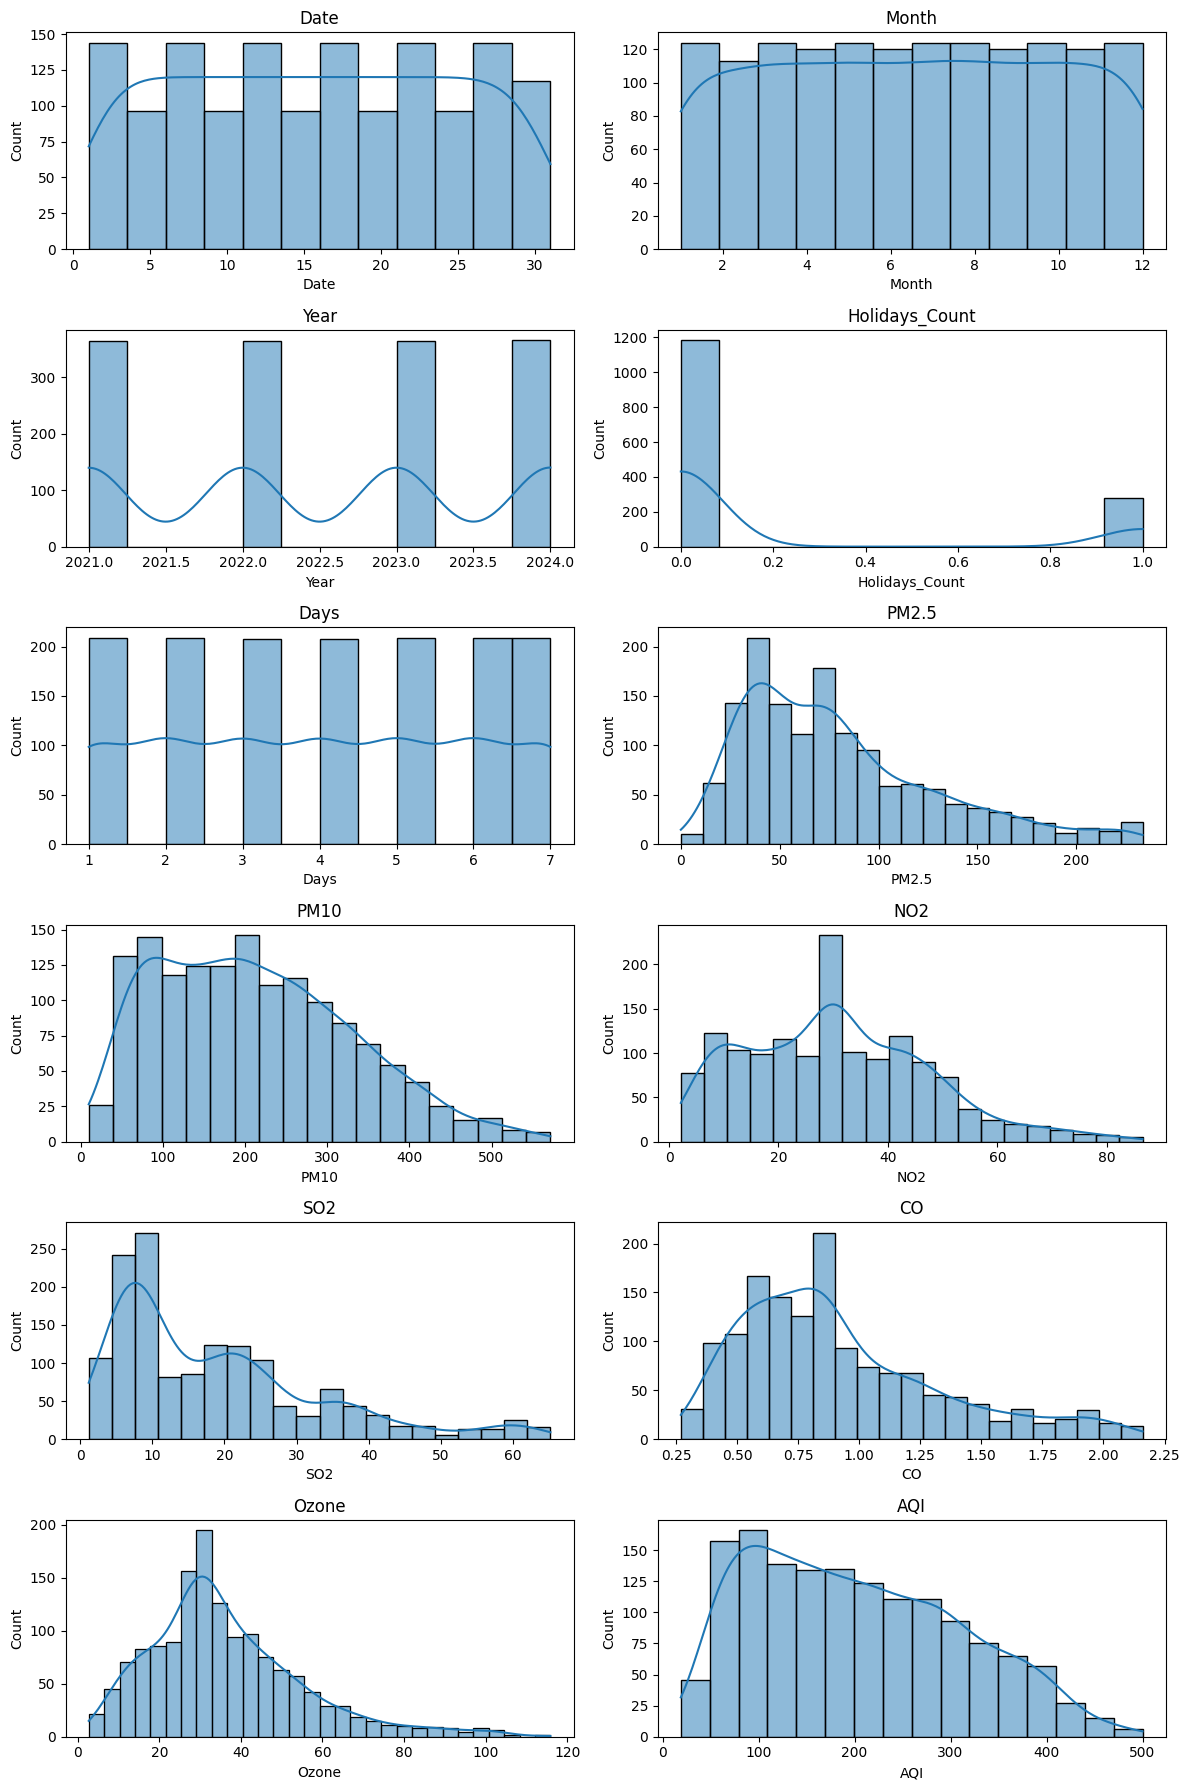

In [18]:

plt.figure(figsize=(12, 18))
k = 1
for i in columns: 
    plt.subplot(6, 2, k)
    sns.histplot(x=i, kde=True, data=df)
    plt.title(i)
    k += 1

plt.tight_layout()
plt.show()


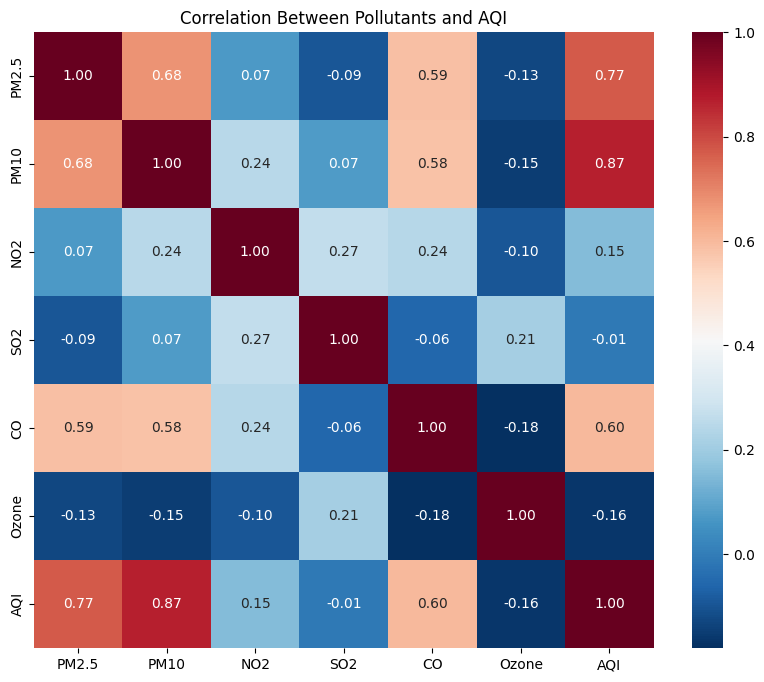

In [35]:
plt.figure(figsize=(10, 8))
correlation = df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']].corr()
sns.heatmap(correlation, annot=True, cmap='RdBu_r', fmt='.2f')
plt.title('Correlation Between Pollutants and AQI')
plt.show()

In [19]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
Date,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,...,22.00,23.00,24.00,25.00,26.00,27.00,28.00,29.00,30.00,31.00
Month,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00
Year,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,...,2024.00,2024.00,2024.00,2024.00,2024.00,2024.00,2024.00,2024.00,2024.00,2024.00
Holidays_Count,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
Days,5.00,6.00,7.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,...,7.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,1.00,2.00
PM2.5,72.06,72.06,225.07,89.55,54.06,155.59,118.39,140.05,144.01,131.57,...,135.05,136.27,88.98,86.53,86.75,58.43,33.83,31.21,38.01,80.42
PM10,442.42,561.95,239.04,132.08,55.54,180.14,131.18,184.29,192.43,180.38,...,507.69,506.57,327.40,344.46,333.56,249.17,150.77,139.75,152.83,318.96
NO2,30.49,52.85,30.49,30.49,30.49,30.49,30.49,30.49,30.49,30.49,...,68.82,63.35,49.58,52.68,52.00,41.69,33.31,27.01,29.12,40.37
SO2,12.95,5.18,10.93,10.42,9.70,10.29,9.81,10.34,10.41,9.92,...,62.42,62.14,62.53,62.88,64.04,15.43,15.43,15.43,65.16,64.98
CO,0.85,0.85,1.40,1.01,0.64,1.18,0.73,0.79,0.85,0.69,...,0.85,0.85,1.29,1.34,1.18,0.99,0.79,0.57,0.55,0.84


In [25]:
X=df.drop('AQI',axis=1)
y=df['AQI']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Optional: xgboost (install with `pip install xgboost`)
from xgboost import XGBRegressor


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'ElasticNet Regression': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'SVR': SVR(),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5)
}

In [42]:
print("Model Evaluation Results:\n")
for name, model in models.items():
    # Some models need scaled data
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'SVR', 'KNN Regressor']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"🔹 {name}")
    print(f"   R² Score : {r2:.4f}")
    print(f"   MSE      : {mse:.2f}")
    print("-" * 40)

Model Evaluation Results:

🔹 Linear Regression
   R² Score : 0.8081
   MSE      : 2490.03
----------------------------------------
🔹 Ridge Regression
   R² Score : 0.8081
   MSE      : 2489.67
----------------------------------------
🔹 Lasso Regression
   R² Score : 0.8085
   MSE      : 2484.89
----------------------------------------
🔹 ElasticNet Regression
   R² Score : 0.8084
   MSE      : 2486.56
----------------------------------------
🔹 Decision Tree
   R² Score : 0.8829
   MSE      : 1519.37
----------------------------------------
🔹 Random Forest
   R² Score : 0.9318
   MSE      : 884.51
----------------------------------------
🔹 Gradient Boosting
   R² Score : 0.9277
   MSE      : 938.07
----------------------------------------
🔹 XGBoost
   R² Score : 0.9179
   MSE      : 1065.25
----------------------------------------
🔹 SVR
   R² Score : 0.5343
   MSE      : 6043.24
----------------------------------------
🔹 KNN Regressor
   R² Score : 0.8190
   MSE      : 2349.04
----------

In [37]:
print(y_test.describe())

count    293.000000
mean     207.447099
std      114.109843
min       34.000000
25%      105.000000
50%      189.000000
75%      298.000000
max      500.000000
Name: AQI, dtype: float64
